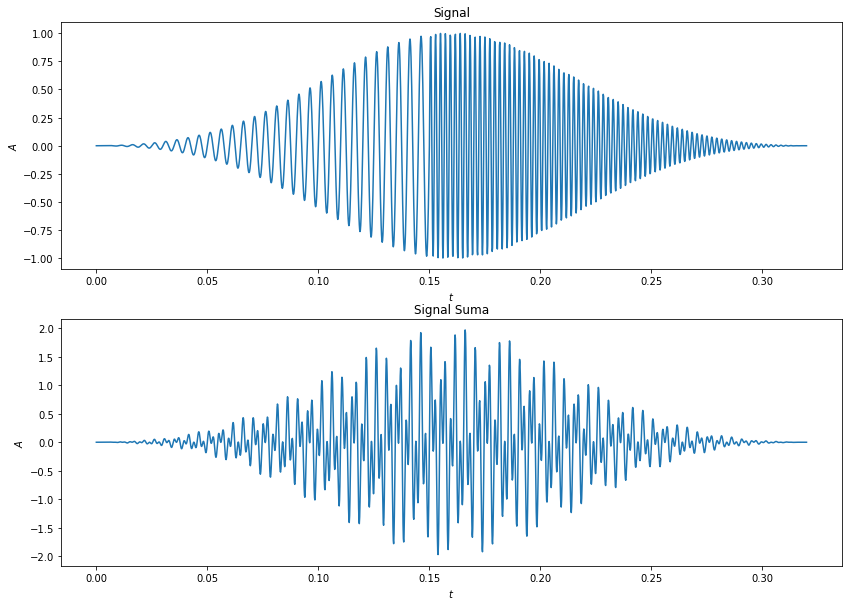

In [25]:
import numpy as np
import matplotlib.pylab as plt

signalt = np.genfromtxt('signal.dat')
signal = np.transpose(signalt)
signalSumat = np.genfromtxt('signalSuma.dat')
signalSuma = np.transpose(signalSumat)

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.plot(signal[0],signal[1])
plt.xlabel('$t$')
plt.ylabel('$A$')
plt.title('Signal')

plt.subplot(2,1,2)
plt.plot(signalSuma[0],signalSuma[1])
plt.xlabel('$t$')
plt.ylabel('$A$')
plt.title('Signal Suma')

plt.savefig('2_Signal.pdf')

In [3]:
#Sólo para las amplitudes:

def FourierTransform(X):
    N = X.size
    F = np.zeros((N),dtype=complex)
    i = 0.0+1.0j
    for k in range(N):
        F[k] = sum( X[j]*np.exp((-2*np.pi*i)*k*j/N) for j in range(N))
    return F

#Cambio de dominio a frecuencia. n es el tamaño de la señal y d es el sample rate, i.e. 1/(distancia promedio entre datos del dominio t)

def freq(n,d):
    f = np.zeros((n),dtype=complex)
    if n%2 == 0:
        for i in range(n):
            if i<n/2:
                f[i]= i
            else:
                f[i] = i-n
    else:
        for i in range(n):
            if i<=(n-1)/2:
                f[i]= i
            else:
                f[i] = i-1-n
    return f/(n*d)

print('Implementé el cambio de dominio de tiempo a frecuencias.')

Implementé el cambio de dominio de tiempo a frecuencias.


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


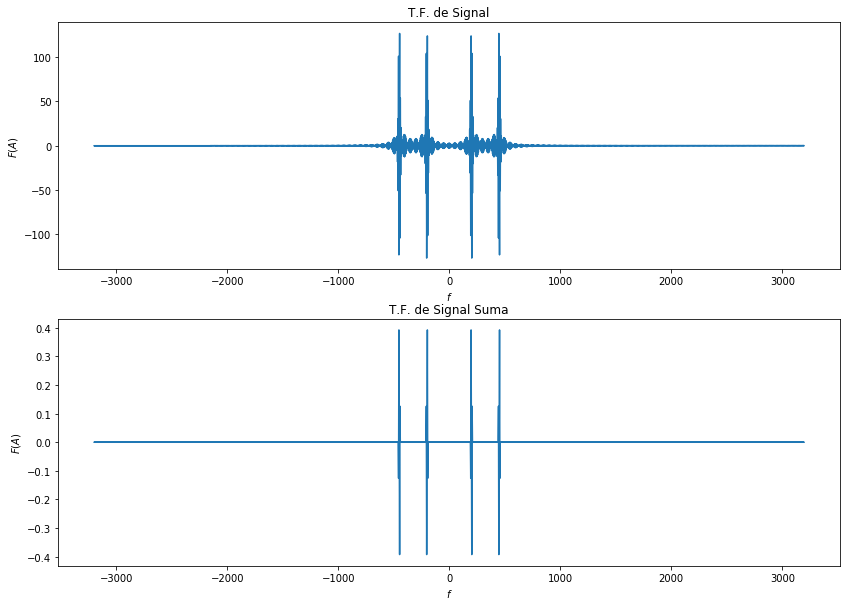

In [4]:
Fsignal = np.array([freq(signal[0].size,abs(signal[0,1]-signal[0,0])),FourierTransform(signal[1])])
FsignalSuma = np.array([freq(signalSuma[0].size,abs(signalSuma[0,1]-signalSuma[0,0])),FourierTransform(signalSuma[1])])

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.plot(Fsignal[0],Fsignal[1])
plt.xlabel('$f$')
plt.ylabel('$F(A)$')
plt.title('T.F. de Signal')

plt.subplot(2,1,2)
plt.plot(FsignalSuma[0],FsignalSuma[1])
plt.xlabel('$f$')
plt.ylabel('$F(A)$')
plt.title('T.F. de Signal Suma')

plt.savefig('2_FourierSignal.pdf')

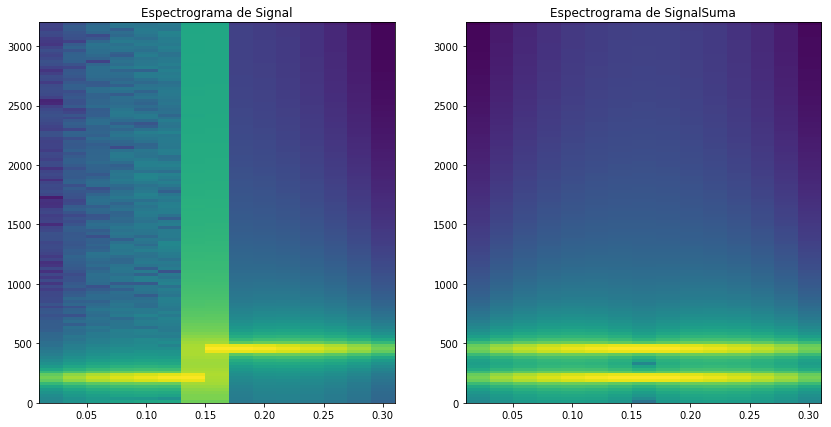

In [24]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.specgram(signal[1], Fs=1/abs(signal[0,1]-signal[0,0]))
plt.title('Espectrograma de Signal')

plt.subplot(1,2,2)
plt.specgram(signalSuma[1], Fs=1/abs(signalSuma[0,1]-signalSuma[0,0]))
plt.title('Espectrograma de SignalSuma')

plt.savefig('2_Espectrogramas.pdf')

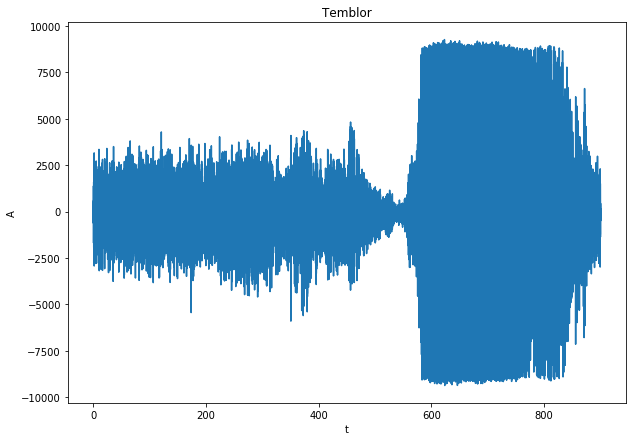

In [19]:
from scipy.fftpack import fft,fftfreq

Temblort = np.genfromtxt('temblor.txt', skip_header=4)
Temblor = np.transpose(Temblort)
sr = 100 #Hz
T = np.linspace(0, Temblor.size/sr, Temblor.size)

plt.figure(figsize=(10,7))
plt.plot(T, Temblor)
plt.title('Temblor')
plt.ylabel('A')
plt.xlabel('t')
plt.savefig('Temblor.pdf')

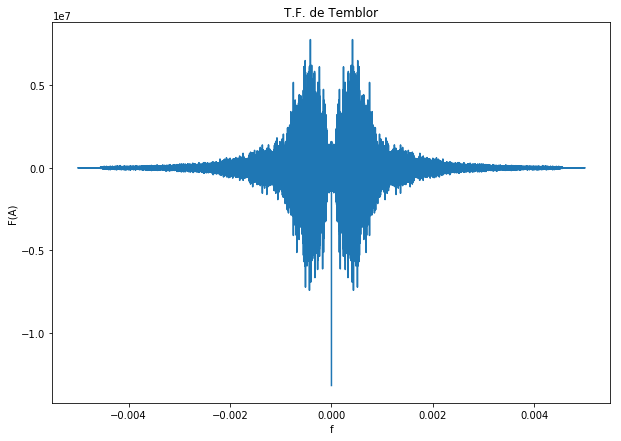

In [20]:
FTemblor = fft(Temblor)
fT = fftfreq(T.size, sr)

plt.figure(figsize=(10,7))
plt.plot(fT, FTemblor)
plt.title('T.F. de Temblor')
plt.ylabel('F(A)')
plt.xlabel('f')
plt.savefig('FourierTemblor.pdf')

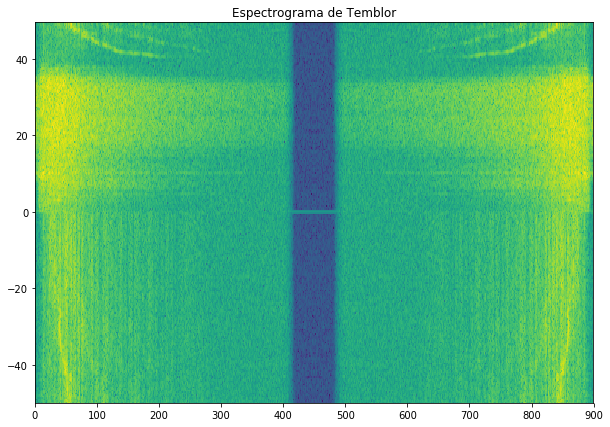

In [23]:
plt.figure(figsize=(10,7))
plt.specgram(FTemblor, Fs=sr)
plt.title('Espectrograma de Temblor')
plt.savefig('EspectrogramaTemblor.pdf')